# Style transfer using CNN

### Import dependencies

In [1]:
import numpy as np
from PIL import Image

from keras.applications.vgg16 import VGG16
from keras import backend
from keras.models import Model

import time

from scipy.optimize import fmin_l_bfgs_b
from scipy.misc import imsave

Using TensorFlow backend.


### Loading Images : Content Image and Style Image

In [2]:
def load_image(image_path):
    image = Image.open(image_path)
    return image

We will also need to resize the image to reduce computational overhead

In [6]:
def resize_image(image, h, w):
    resized_image = image.resize((h, w))
    return resized_image

We need to specifiy a default dimension for our images, we're setting it to 512 X 512

In [9]:
h = 512
w = 512

Now we need to load the images and resize them. First the style image and then the content image.

In [10]:
style_img_path = "images/style/van_gogh_portrait.jpg"

style_img = load_image(style_img_path)
style_img_resized = resize_image(style_img, h, w)

Let's check the style image.

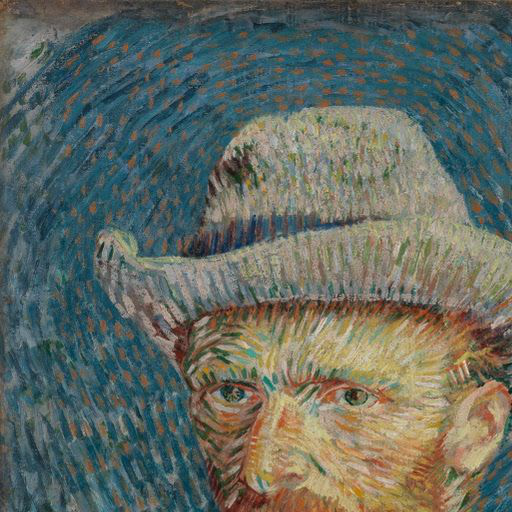

In [11]:
style_img_resized

Now the content image.

In [13]:
content_img_path = "images/content/shakib_2.jpeg"
content_img = load_image(content_img_path)
content_img_resized = resize_image(content_img, h, w)

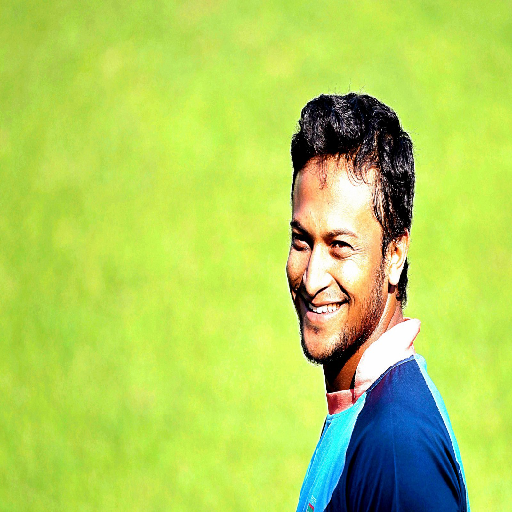

In [14]:
content_img_resized

### Converting images to arrays for numerical analysis

In [15]:
style_img_array = np.asarray(style_img_resized, dtype="float32")
content_img_array = np.asarray(content_img_resized, dtype="float32")

We need to add an additional dimension to the arrays for bias.

In [16]:
style_img_array = np.expand_dims(style_img_array, axis=0)
content_img_array = np.expand_dims(content_img_array, axis=0)

In [17]:
print(content_img_array.shape)
print(style_img_array.shape)

(1, 512, 512, 3)
(1, 512, 512, 3)


Now we need the average RGB value of an image.

In [23]:
def get_avg_rgb(image_array):
    avg_rgb = np.mean(image_array, axis=(0, 1, 2))
    return avg_rgb

In [24]:
style_avg_rgb = get_avg_rgb(style_img_array)
content_avg_rgb = get_avg_rgb(content_img_array)

print(style_avg_rgb)
print(content_avg_rgb)

[  98.45629883  105.61911011   97.47766113]
[ 177.70637512  210.04502869   89.24848175]


Now we need to subtract the avg rgb from image and format it in BGR format (as stated in VGG16 paper)

In [25]:
style_array = style_img_array - style_avg_rgb
content_array = content_img_array - content_avg_rgb

In [26]:
def convert_to_bgr(image_array):
    return image_array[:, :, :, ::-1]

In [27]:
conv_style = convert_to_bgr(style_array)
conv_content = convert_to_bgr(content_array)

### Feeding images as variable into Keras

In [28]:
style_var = backend.variable(conv_style)
content_var = backend.variable(conv_content)

In [29]:
combination_img = backend.placeholder((1, h, w, 3))

Since using Tensorflow backend and it needs tensors, we convert the image data into one concatened tensor.

In [30]:
input_tensor = backend.concatenate([content_var, style_var, combination_img], axis = 0)

### Getting the model ready

In [33]:
model = VGG16(input_tensor=input_tensor, weights="imagenet", include_top=False)

58851328/58889256 [============================>.] - ETA: 0s

ImportError: `load_weights` requires h5py.